In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
data = pd.read_csv("data_preprocessed.csv")
data.shape

(47519, 16)

In [3]:
data.columns

Index(['Unnamed: 0', 'Program', 'Research Exp', 'Industry Exp', 'Intern Exp',
       'Journal Pubs', 'ConfPubs', 'TOEFL Score', 'TOEFL Essay', 'greV',
       'greQ', 'greA', 'Topper CGPA', 'CGPA', 'UG label', 'ranking'],
      dtype='object')

In [7]:
data

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,189
47515,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,15
47516,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,129
47517,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,129


In [6]:
serial = data["Unnamed: 0"]
data.drop(["Unnamed: 0"],axis=1,inplace = True)

In [8]:
import numpy as np
data = (data - np.min(data))/(np.max(data)-np.min(data))
X = data.drop(["CGPA"],axis=1)
y = data.CGPA

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [10]:
# for data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whiten = normalize
pca.fit(X)
x_pca = pca.transform(X)
x_pca = x_pca.reshape(47519,)
dictionary = {"x":x_pca,"y":y}
data1 = pd.DataFrame(dictionary)
print("data:")
print(data1.head())
print("\ndata:")
print(data.head())

data:
          x         y
0 -0.859788  0.559841
1 -0.924523  0.559841
2 -0.875399  0.559841
3  0.684632  0.303333
4  0.682128  0.636508

data:
   Program  Research Exp  Industry Exp  Intern Exp  Journal Pubs  ConfPubs  \
0      0.0           0.0           0.0         0.0           0.0       0.0   
1      0.0           0.0           0.0         0.0           0.0       0.0   
2      0.0           0.0           0.0         0.0           0.0       0.0   
3      0.0           0.0           0.0         0.0           0.0       0.0   
4      0.0           0.0           0.0         0.0           0.0       0.0   

   TOEFL Score  TOEFL Essay      greV      greQ      greA  Topper CGPA  \
0     0.340067          0.0  0.580514  0.818182  0.461538     0.355116   
1     0.340067          0.0  0.580514  0.818182  0.461538     0.355116   
2     0.340067          0.0  0.580514  0.818182  0.461538     0.355116   
3     0.306397          0.0  0.193505  0.155682  0.230769     0.372093   
4     0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

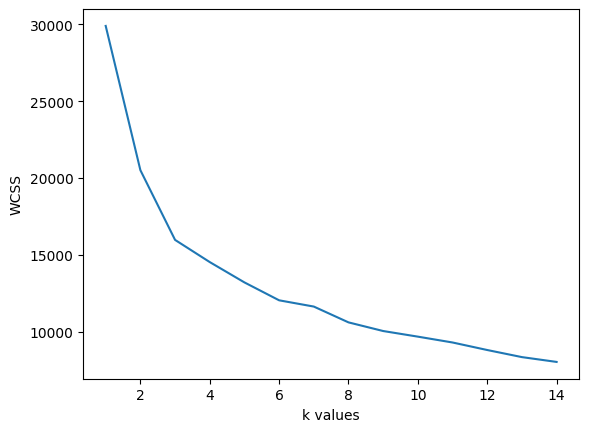

In [11]:
data["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


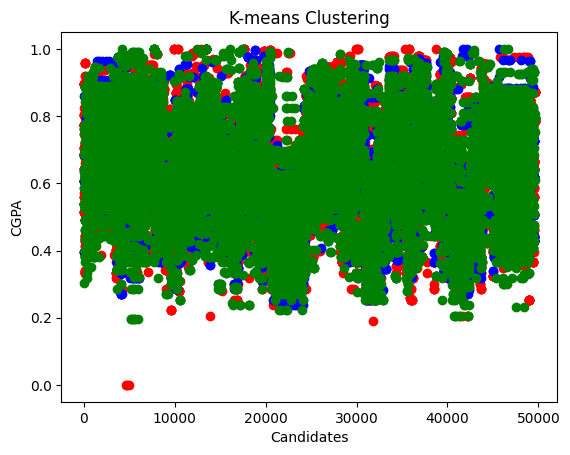

In [13]:
kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(X)

data["label_kmeans"] = clusters_knn


plt.scatter(data[data.label_kmeans == 0 ]["Serial No."], data[data.label_kmeans == 0].CGPA,color = "red")
plt.scatter(data[data.label_kmeans == 1 ]["Serial No."], data[data.label_kmeans == 1].CGPA,color = "blue")
plt.scatter(data[data.label_kmeans == 2 ]["Serial No."], data[data.label_kmeans == 2].CGPA,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("CGPA")
plt.show()

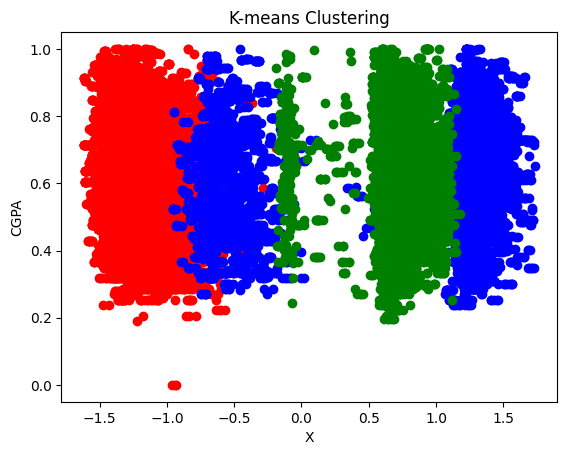

In [15]:
data["label_kmeans"] = clusters_knn
plt.scatter(data1.x[data.label_kmeans == 0 ],data1[data.label_kmeans == 0].y,color = "red")
plt.scatter(data1.x[data.label_kmeans == 1 ],data1[data.label_kmeans == 1].y,color = "blue")
plt.scatter(data1.x[data.label_kmeans == 2 ],data1[data.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("CGPA")
plt.show()